# American Sign Language Recognition using CNN 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

In [2]:
train = pd.read_csv("/content/sign_mnist_train.csv")
test = pd.read_csv("/content/sign_mnist_test.csv")
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [3]:
train.shape

(27455, 785)

In [5]:
labels = train['label'].values
unique_val = np.array(labels)
np.unique(unique_val)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])

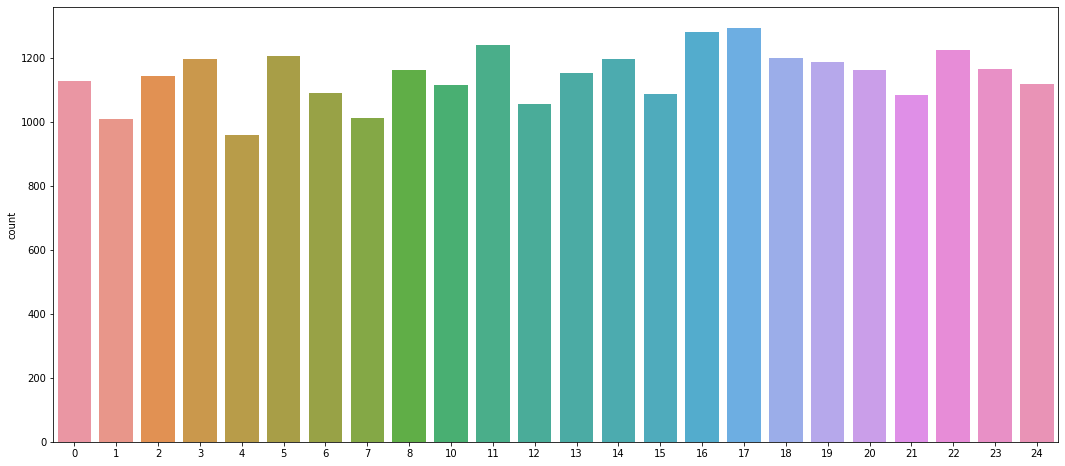

In [6]:
plt.figure(figsize = (18,8))
sns.countplot(x =labels)

In [7]:
train.drop('label', axis = 1, inplace = True)

In [8]:
images = train.values
images = np.array([np.reshape(i, (28, 28)) for i in images])
images = np.array([i.flatten() for i in images])

In [9]:
from sklearn.preprocessing import LabelBinarizer
label_binrizer = LabelBinarizer()
labels = label_binrizer.fit_transform(labels)

In [10]:
labels

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]])

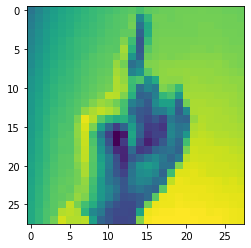

In [11]:
plt.imshow(images[0].reshape(28,28))

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size = 0.3, random_state = 101)

In [13]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

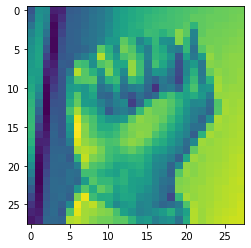

In [14]:
batch_size = 128
num_classes = 24
epochs = 50
x_train = x_train / 255
x_test = x_test / 255
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
plt.imshow(x_train[0].reshape(28,28))

In [15]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(3,3), activation = 'relu', input_shape=(28, 28 ,1) ))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.20))

model.add(Dense(num_classes, activation = 'softmax'))

In [16]:
model.compile(loss = keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])
history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs=epochs, batch_size=batch_size)

Epoch 1/50
151/151 [==============================] - 22s 138ms/step - loss: 2.7472 - accuracy: 0.1587 - val_loss: 1.9299 - val_accuracy: 0.3716
Epoch 2/50
151/151 [==============================] - 19s 126ms/step - loss: 1.5073 - accuracy: 0.5023 - val_loss: 0.9907 - val_accuracy: 0.6834
Epoch 3/50
151/151 [==============================] - 19s 124ms/step - loss: 0.8613 - accuracy: 0.7061 - val_loss: 0.5964 - val_accuracy: 0.8124
Epoch 4/50
151/151 [==============================] - 19s 124ms/step - loss: 0.5611 - accuracy: 0.8131 - val_loss: 0.4136 - val_accuracy: 0.8725
Epoch 5/50
151/151 [==============================] - 18s 123ms/step - loss: 0.3843 - accuracy: 0.8740 - val_loss: 0.2321 - val_accuracy: 0.9315
Epoch 6/50
151/151 [==============================] - 18s 122ms/step - loss: 0.2758 - accuracy: 0.9131 - val_loss: 0.1880 - val_accuracy: 0.9456
Epoch 7/50
151/151 [==============================] - 19s 123ms/step - loss: 0.2066 - accuracy: 0.9321 - val_loss: 0.1362 - val_ac

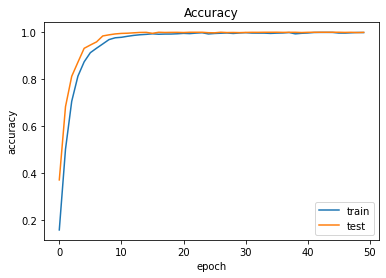

In [17]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Accuracy")
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'])

plt.show()

In [18]:
accuracy = model.evaluate(x=x_test,y=y_test,batch_size=32)
print("Accuracy: ",accuracy[1])

258/258 [==============================] - 5s 18ms/step - loss: 0.0014 - accuracy: 0.9996
Accuracy:  0.9996358156204224


In [19]:
def keras_predict(model, image):
    data = np.asarray( image, dtype="int32" )
    pred_probab = model.predict(data)[0]
    pred_class = list(pred_probab).index(max(pred_probab))
    return max(pred_probab), pred_class

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 1, 1, 64)         0

In [21]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)
!apt install graphviz
!pip install pydot pydot-ng
!echo "Double check with Python 3"
!python -c "import pydot"

Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Double check with Python 3


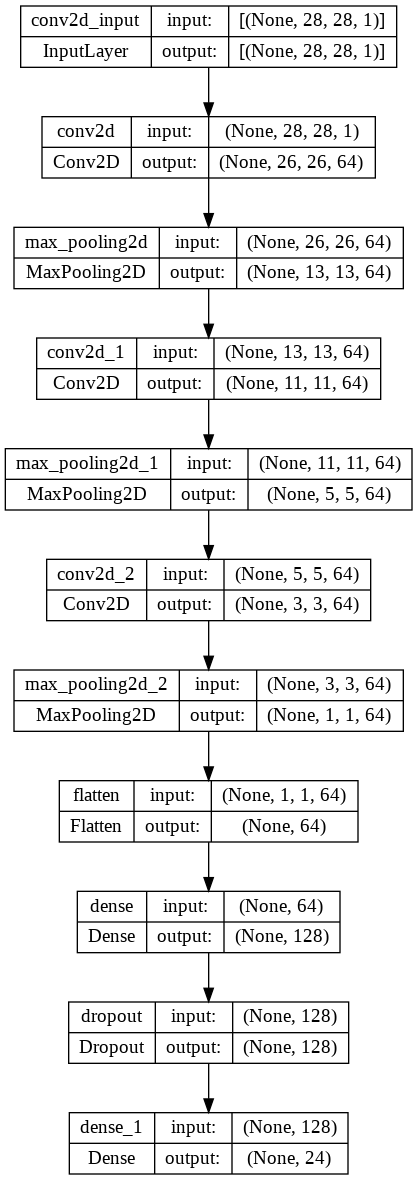

In [22]:
plot_model(model, show_shapes=True, show_layer_names=True, to_file='model.png')
from IPython.display import Image
Image(retina=True, filename='model.png')

In [23]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [24]:
model.save('model.h5')
weights_file = drive.CreateFile({'title' : 'model.h5'})
weights_file.SetContentFile('model.h5')
weights_file.Upload()
drive.CreateFile({'id': weights_file.get('id')})

GoogleDriveFile({'id': '1Rd0R2nUYUOu29JFXFpeTFtBAqy67dWZp'})